# K-Nearest Neighbor classification (KNN) exercises
## 0. MNIST data (*)

In [117]:
from  tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from PIL import Image

### a) Check help() on keras.datasets.mnist.load_data and read to find out how to unpack the data properly.

In [2]:
help(keras.datasets.mnist.load_data)


Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
    
  

In [3]:
(x_train_val, y_train_val), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train_val.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train_val.shape == (60000,)
assert y_test.shape == (10000,)

 ### b) Check the shapes of X_train, X_test, y_train, y_test. What does each dimension mean?

In [4]:
x_train_val.shape, y_train_val.shape, x_test.shape, y_test.shape  

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

 x
- Första dimensionen är varje bild
- Andra dimensionen är raderna för pixlarna i bilden
- Tredje dimensionen är kolonnerna för pixlarna i bilden

y
- Siffran som motsvarar bilden


### c) How many images are there in X_train?

In [5]:

print(f"Antalet bilder i x_train är {x_train_val.shape[0]}")

Antalet bilder i x_train är 60000


### d) Check smallest and largest value of a sample image of your choice. What do these numbers in the matrix represent? Plot this image using plt.imshow() and set cmap to "gray" to get the correct representation of the grayscale image.

In [6]:
exempel_idx = 2 
exempelbild, exmepelsiffra = x_train_val[exempel_idx], y_train_val[exempel_idx]

print(f"Min: {exempelbild.min()}, Max: {exempelbild.max()}")
# Gråskalefärg 0 vitt,  255 svart

Min: 0, Max: 255


Siffra 4


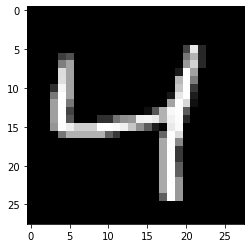

In [7]:
plt.imshow(exempelbild, cmap="gray")
print(f"Siffra {exmepelsiffra}")

### e) Plot 20 sample images.

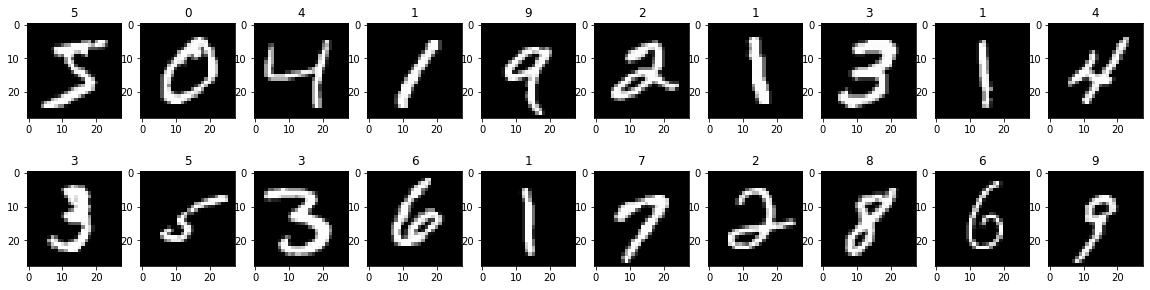

In [8]:
fig, axes = plt.subplots(2, 10)
fig.set_size_inches(20,5)
for bild, ax, siffra in zip(x_train_val[0:20], axes.flatten(), y_train_val[0:20]):
    ax.imshow(bild, cmap="gray")
    ax.set_title(siffra)


###

### f) When you checked the shapes of the data you noticed that X_train, X_test are 3D tensors (generalization of a matrix to more dimensions). However KNN classifier in scikit-learn requires a 2D tensor or a matrix. Reshape X_train and X_test to appropriate shapes.

In [68]:
x_train_val_2d = x_train_val.reshape(x_train_val.shape[0] , -1)
x_test_2d = x_test.reshape(x_test.shape[0] , -1)
x_train_val_2d.shape, x_test_2d.shape

((60000, 784), (10000, 784))

## 1. Train|test|validation split (*)

In [56]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val_2d, y_train_val, test_size=1000, random_state=43)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((59000, 784), (1000, 784), (59000,), (1000,))

## 2. Hyperparameter tuning (*)

In [225]:
errors = list()
k_range = range(1, 100, 2)
for k in k_range:
    model_tuning = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
    model_tuning.fit(x_train, y_train)
    y_val_prediction = model_tuning.predict(x_val)
    errors.append(1 - accuracy_score(y_val, y_val_prediction))
    
    print(k, end=" ")



1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95 97 99 

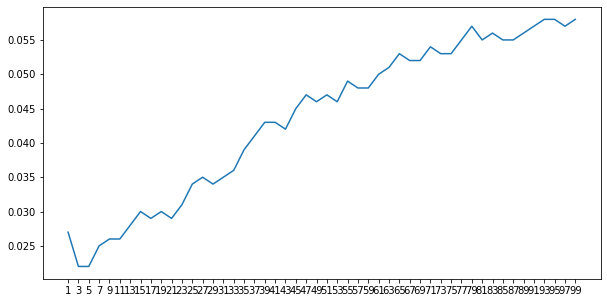

In [226]:
plt.figure(figsize=(10,5))
plt.plot(k_range, errors)
plt.xticks(k_range);


In [82]:
k_vald = errors.index(min(errors))*2+1
print(f"Valt antal grannar k = {k_vald}")

Valt antal grannar k = 3


##

## 3. Train and predict (*)


In [227]:
model = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
model.fit(x_train_val_2d, y_train_val)
y_prediction = model.predict(x_test_2d)

### a) Do a classification report and based on the report, can you figure out which number had highest proportions of false negatives. False negative in this case means that the true label is  i  but the model predicted not  i .

In [228]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       980
           1       0.88      1.00      0.94      1135
           2       0.99      0.89      0.93      1032
           3       0.95      0.95      0.95      1010
           4       0.97      0.92      0.95       982
           5       0.96      0.94      0.95       892
           6       0.95      0.98      0.97       958
           7       0.93      0.93      0.93      1028
           8       0.98      0.90      0.94       974
           9       0.91      0.95      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.94      0.94     10000



Lågt recall bör ha större andel falska positiva
- 8 lägst
- 2, 4 och 9 näst lägst

###   b) Plot a confusion matrix, does this confirm your answer in a?

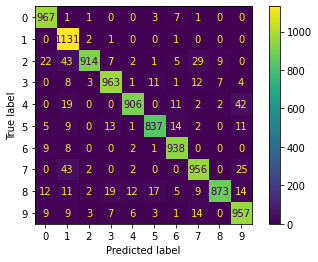

In [229]:
confused = confusion_matrix(y_test, y_prediction)


ConfusionMatrixDisplay(confused).plot();

Svar ja!

### c) Compute the number of misclassifications for each number. Which number had most misclassifications, do you have any suggestions on why this would be the case?

[13, 4, 118, 47, 76, 55, 20, 72, 101, 52]


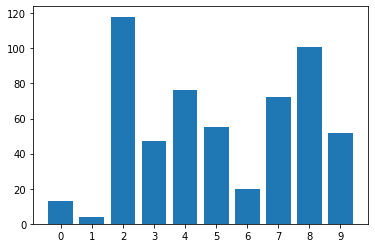

In [230]:
fn = [ sum(rad) for rad in confused * -(np.identity(10, np.int8)-1) ]
plt.bar(range(10), fn)
plt.xticks(range(10));
print(fn)

0 och 1 är enkla former.  Medan de andra har mer kompicerad form. Som lättare kan misstas för någon annan.

## 4. Predict your own handwriting (**)

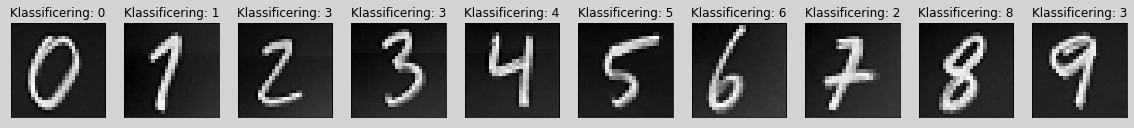

In [231]:
#bilder = ["Siffror/0.png", "Siffror/1.png", "Siffror/2.png", "Siffror/3.png", "Siffror/4.png", "Siffror/5.png", "Siffror/6.3.png", "Siffror/7.png", "Siffror/8.4.png", "Siffror/9.png"]
bilder = ["Siffror/0_hand_1.png", "Siffror/1_hand.png", "Siffror/2_hand.png", "Siffror/3_hand.png", "Siffror/4_hand.png", "Siffror/5_hand.png", "Siffror/6_hand.png", "Siffror/7_hand.png", "Siffror/8_hand.png", "Siffror/9_hand.png"]

bilder_pixlar = list()

fig, axes = plt.subplots(1, len(bilder))
fig.set_size_inches(20,5)
fig.set_facecolor("lightgrey")

for bild, ax in zip(bilder, axes.flatten()):
    with Image.open(bild).convert("L") as pic:
        pixlar = -(np.array(pic) - 255)
        ax.imshow(pixlar, cmap="gray")
        ax.set_xticks([]), ax.set_yticks([])
        
        bilder_pixlar.append(pixlar.reshape( -1))

 

predictions = model.predict(bilder_pixlar)

for ax, pred in zip(axes, predictions):
    ax.set_title(f"Klassificering: {pred}")